In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
data1 = pd.read_csv('/content/drive/MyDrive/bjp_tweets.csv')
data2 = pd.read_csv('/content/drive/MyDrive/congress_tweets.csv')
data = pd.concat([data1,data2])
# Preprocess the text by converting it to lowercase and removing unnecessary characters
data['text'] = data['tweet'].str.lower()
data['text'] = data['tweet'].str.replace('[^\w\s]', '')
count_target = data['target']
data.drop('tweet', inplace=True, axis=1)
data.head()

<ipython-input-3-a68b0cc570d9>:6: FutureWarning: The default value of regex will change from True to False in a future version.
  data['text'] = data['tweet'].str.replace('[^\w\s]', '')


,Unnamed: 0,target,text
0,0,0,ndtv anchor let go over to aap live press conf...
1,1,0,sambit patra attacks rahul gandhi over his cow...
2,2,1,crediting the bjp with taking development to s...
3,3,0,ktrbrs do do false allegations on iasassociati...
4,4,1,gujarat assembly yet to get rs cr as gst compe...


Text(0, 0.5, 'Labels count')

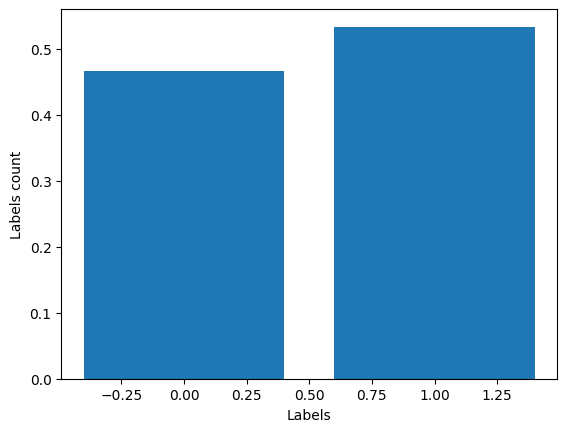

In [4]:
df = pd.DataFrame(data)
sentiments = df["target"].unique()
sentiment_nums = [len(df[df["target"] == sentiment]) / len(df) for sentiment in sentiments]
plt.bar(sentiments, sentiment_nums)
plt.xlabel("Labels")
plt.ylabel("Labels count")

In [5]:
train_size = int(0.8 * len(data))
train_data = data[:train_size]
test_data = data[train_size:]

In [6]:
max_features = 10000  # Maximum number of words to keep based on word frequency
tokenizer = Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(train_data['text'])
train_sequences = tokenizer.texts_to_sequences(train_data['text'])
test_sequences = tokenizer.texts_to_sequences(test_data['text'])

In [7]:
max_len = 100  # Maximum length of a sequence
X_train = pad_sequences(train_sequences, maxlen=max_len)
X_test = pad_sequences(test_sequences, maxlen=max_len)

In [8]:
y_train = train_data['target'].values
y_test = test_data['target'].values

In [9]:
embedding_dim = 100  # Dimension of the word embeddings
model = Sequential()
model.add(Embedding(max_features, embedding_dim, input_length=max_len))
model.add(LSTM(128))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
batch_size = 32
epochs = 25
history = model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(X_test, y_test))

Epoch 1/25
1994/1994 [==============================] - 491s 243ms/step - loss: 0.4162 - accuracy: 0.8034 - val_loss: 0.4904 - val_accuracy: 0.7604
Epoch 2/25
1994/1994 [==============================] - 469s 235ms/step - loss: 0.2834 - accuracy: 0.8748 - val_loss: 0.4808 - val_accuracy: 0.7737
Epoch 3/25
1994/1994 [==============================] - 472s 237ms/step - loss: 0.2236 - accuracy: 0.9018 - val_loss: 0.4803 - val_accuracy: 0.7793
Epoch 4/25
1994/1994 [==============================] - 466s 234ms/step - loss: 0.1753 - accuracy: 0.9259 - val_loss: 0.5233 - val_accuracy: 0.7946
Epoch 5/25
1994/1994 [==============================] - 475s 238ms/step - loss: 0.1335 - accuracy: 0.9455 - val_loss: 0.5548 - val_accuracy: 0.7954
Epoch 6/25
1994/1994 [==============================] - 472s 237ms/step - loss: 0.0982 - accuracy: 0.9611 - val_loss: 0.6135 - val_accuracy: 0.7954
Epoch 7/25
1994/1994 [==============================] - 471s 236ms/step - loss: 0.0709 - accuracy: 0.9740 - val_

In [ ]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

In [ ]:
#Saving the model
from tensorflow.keras.models import load_model
model.save('/content/drive/MyDrive/internship/pt7.hdf5')

In [ ]:
#Loading the model
from tensorflow.keras.models import load_model
model = load_model('/content/drive/MyDrive/internship/pt7.hdf5')

In [ ]:
loss, accuracy = model.evaluate(X_test, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

In [ ]:
example_statement = "The government's handling of the economic crisis has been a complete failure, with skyrocketing inflation and rising unemployment rates, leaving the common people to suffer while politicians enjoy their privileges"
preprocessed_statement = example_statement.lower().replace('[^\w\s]', '')
sequence = tokenizer.texts_to_sequences([preprocessed_statement])
padded_sequence = pad_sequences(sequence, maxlen=max_len)
prediction = model.predict(padded_sequence)
sentiment = 'Positive' if prediction > 0.5 else 'Negative'
print("Predicted Sentiment:", sentiment)